In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [13]:
ds_anomalies = xr.open_zarr("/data_2/scratch/sbiegel/dimpeo/anomalies_test_again_ndvi_5.zarr")
ds_params = xr.open_zarr("/data_2/scratch/sbiegel/dimpeo/parameters_test_again_ndvi_5.zarr")

/home/sbiegel/miniconda3/envs/dimpeo/lib/python3.12/site-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)


In [ ]:
ds_anomalies

<xarray.Dataset> Size: 14GB
Dimensions:      (N: 11050, E: 17500, time: 73)
Coordinates:
  * N            (N) float64 88kB 1.296e+06 1.296e+06 ... 1.075e+06 1.075e+06
  * E            (E) float64 140kB 2.484e+06 2.484e+06 ... 2.834e+06 2.834e+06
  * time         (time) datetime64[ns] 584B 2023-01-04 2023-01-09 ... 2023-12-30
Data variables:
    forest_mask  (N, E) bool 193MB dask.array<chunksize=(500, 500), meta=np.ndarray>
    data         (time, N, E) uint8 14GB dask.array<chunksize=(73, 500, 500), meta=np.ndarray>
Attributes:
    crs:                  EPSG:2056
    negative_anomaly_id:  0
    normal_id:            1
    positive_anomaly_id:  2
    missing_id:           255

In [6]:
ds_params

<xarray.Dataset> Size: 3GB
Dimensions:      (layer: 4, N: 11050, E: 17500)
Coordinates:
  * layer        (layer) object 32B 'SOS' 'EOS' 'sNDVI' 'wNDVI'
  * N            (N) float64 88kB 1.296e+06 1.296e+06 ... 1.075e+06 1.075e+06
  * E            (E) float64 140kB 2.484e+06 2.484e+06 ... 2.834e+06 2.834e+06
Data variables:
    forest_mask  (N, E) bool 193MB dask.array<chunksize=(500, 500), meta=np.ndarray>
    data         (layer, N, E) float32 3GB dask.array<chunksize=(4, 500, 500), meta=np.ndarray>
Attributes:
    crs:      EPSG:2056

In [ ]:
# check proportion of anomalies
negative_anomaly_mask = (ds_anomalies["data"].values == 0)
no_anomaly_mask = (ds_anomalies["data"].values == 1)
positive_anomaly_mask = (ds_anomalies["data"].values == 2)

print((negative_anomaly_mask.sum() + positive_anomaly_mask.sum()) / no_anomaly_mask.sum())

0.04893224137397038


In [ ]:
# convert zarr file to NetCDF (will be much larger in size)
# ds_anomalies["time"] = ds_anomalies["time"].astype("datetime64[D]")
# ds.to_netcdf("/data_2/scratch/sbiegel/dimpeo/anomalies_testrun.nc", engine="netcdf4")

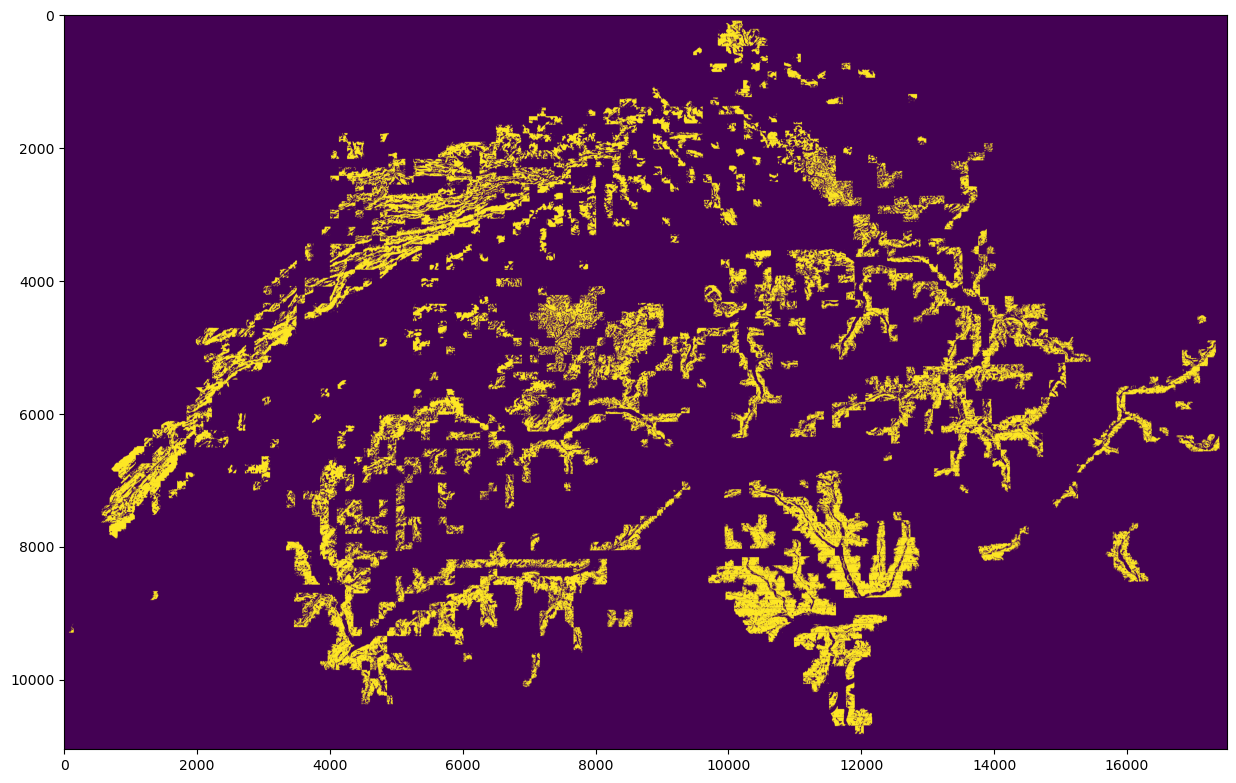

In [ ]:
# Plot the forest mask

fmask = ds_anomalies["forest_mask"].values

plt.figure(figsize=(15, 15))
plt.imshow(fmask)

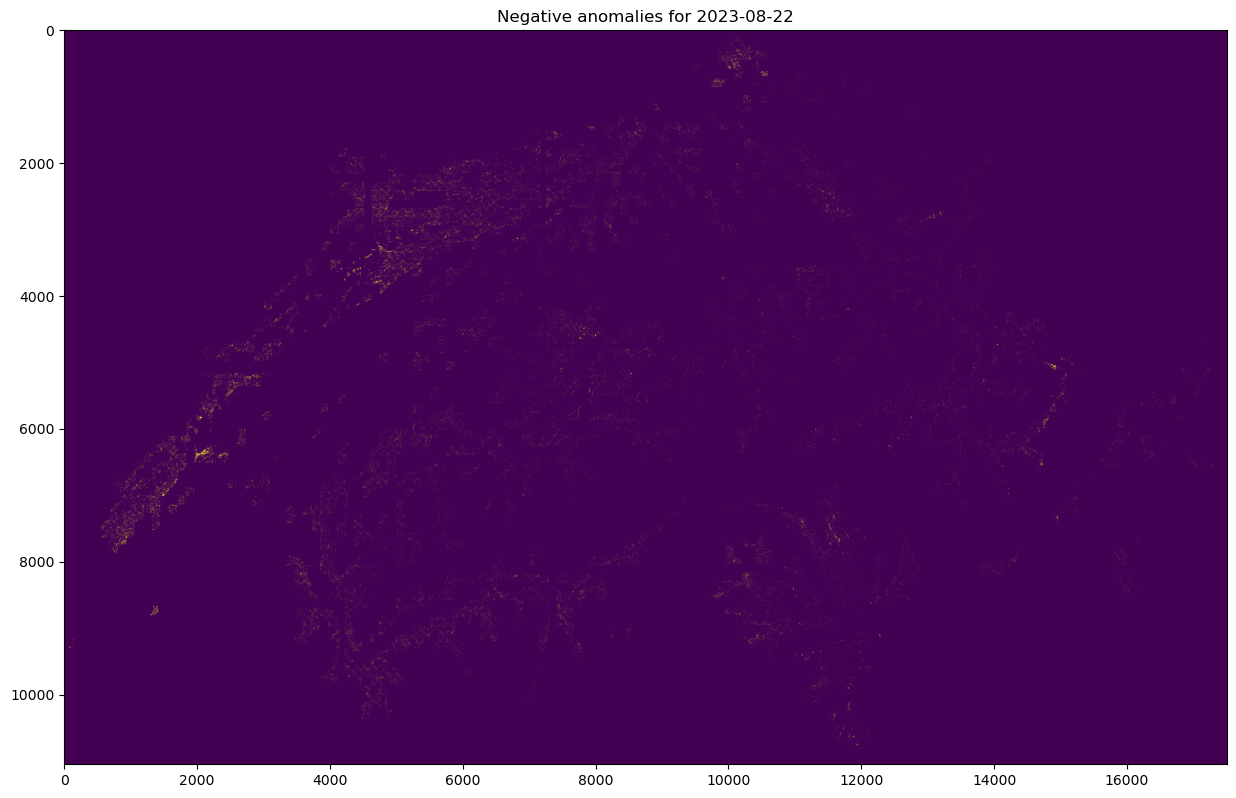

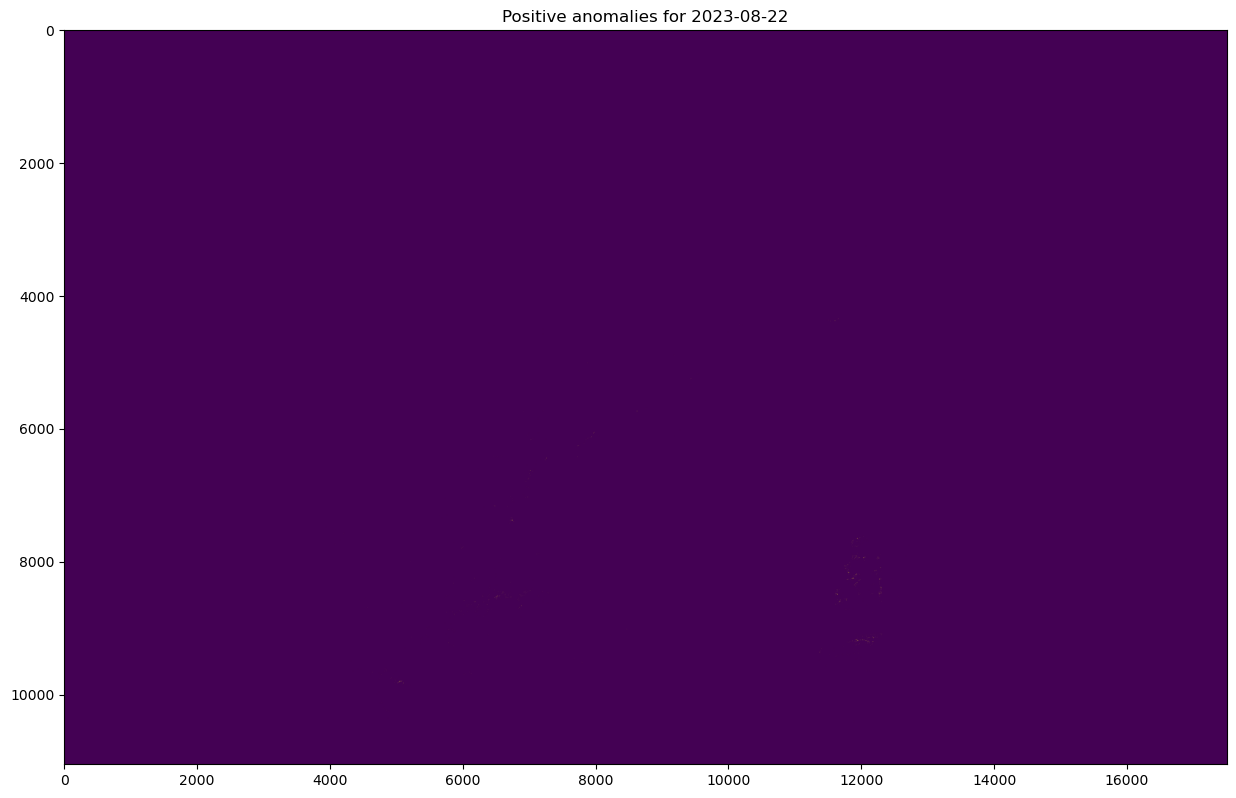

In [ ]:
# Plot anomalies

date = "2023-08-22"

anoms = ds_anomalies["data"].loc["2023-08-22"].values

plt.figure(figsize=(15, 15))
plt.imshow(anoms == 0)
plt.title(f"Negative anomalies for {date}");
plt.show()

plt.figure(figsize=(15, 15))
plt.imshow(anoms == 2)
plt.title(f"Positive anomalies for {date}");
plt.show()

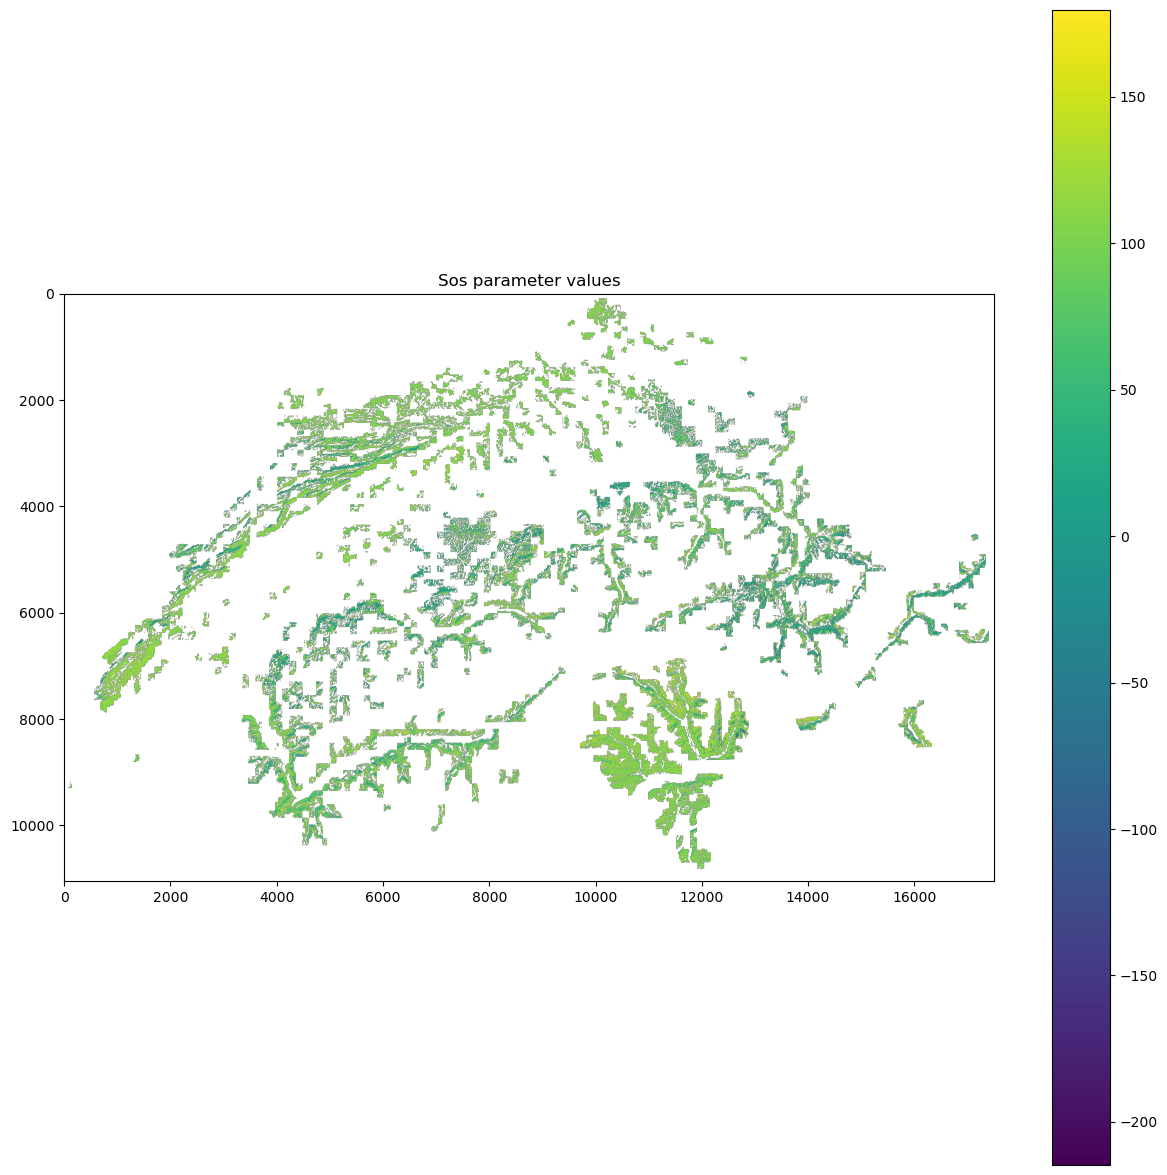

In [13]:
# Plot parameter values
sos = ds_params['data'][0].values*365

plt.figure(figsize=(15, 15))
plt.imshow(sos)
plt.colorbar()
plt.title("Sos parameter values")
plt.show()

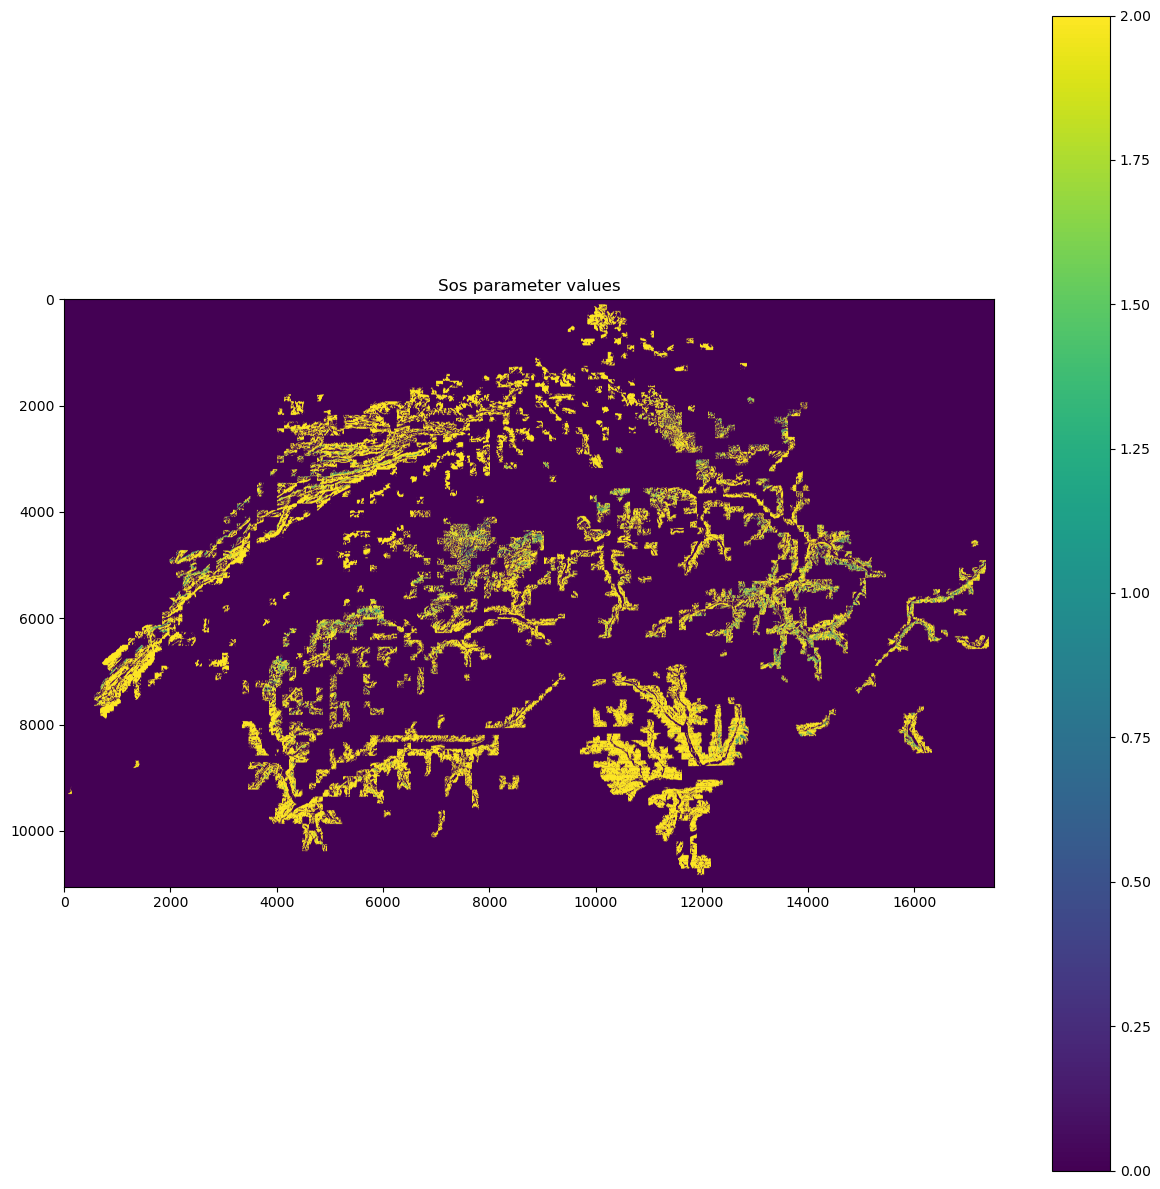

In [14]:
# map sos to two colors: below 0 and above 0
sos_mask = np.zeros(sos.shape)
sos_mask[sos < 0] = 1
sos_mask[sos > 0] = 2
plt.figure(figsize=(15, 15))
plt.imshow(sos_mask)
plt.title("Sos parameter values")
plt.colorbar()
plt.show()

In [ ]:
# print fraction where sos is negative
sos_mask = np.zeros(sos.shape)
sos_mask[sos < 0] = 1
sos_mask[sos > 0] = 2
neg_sos = np.where(sos_mask == 1)
print(f"Fraction of negative sos values: {len(neg_sos[0]) / sos_mask.size}")
# print fraction where sos is positive
sos_mask = np.ma.masked_where(sos_mask == 2, sos_mask)
print(f"Fraction of positive sos values: {sos_mask.count()/sos_mask.size}")

Fraction of negative sos values: 0.0073862495151906914
Fraction of positive sos values: 0.9028095462184874


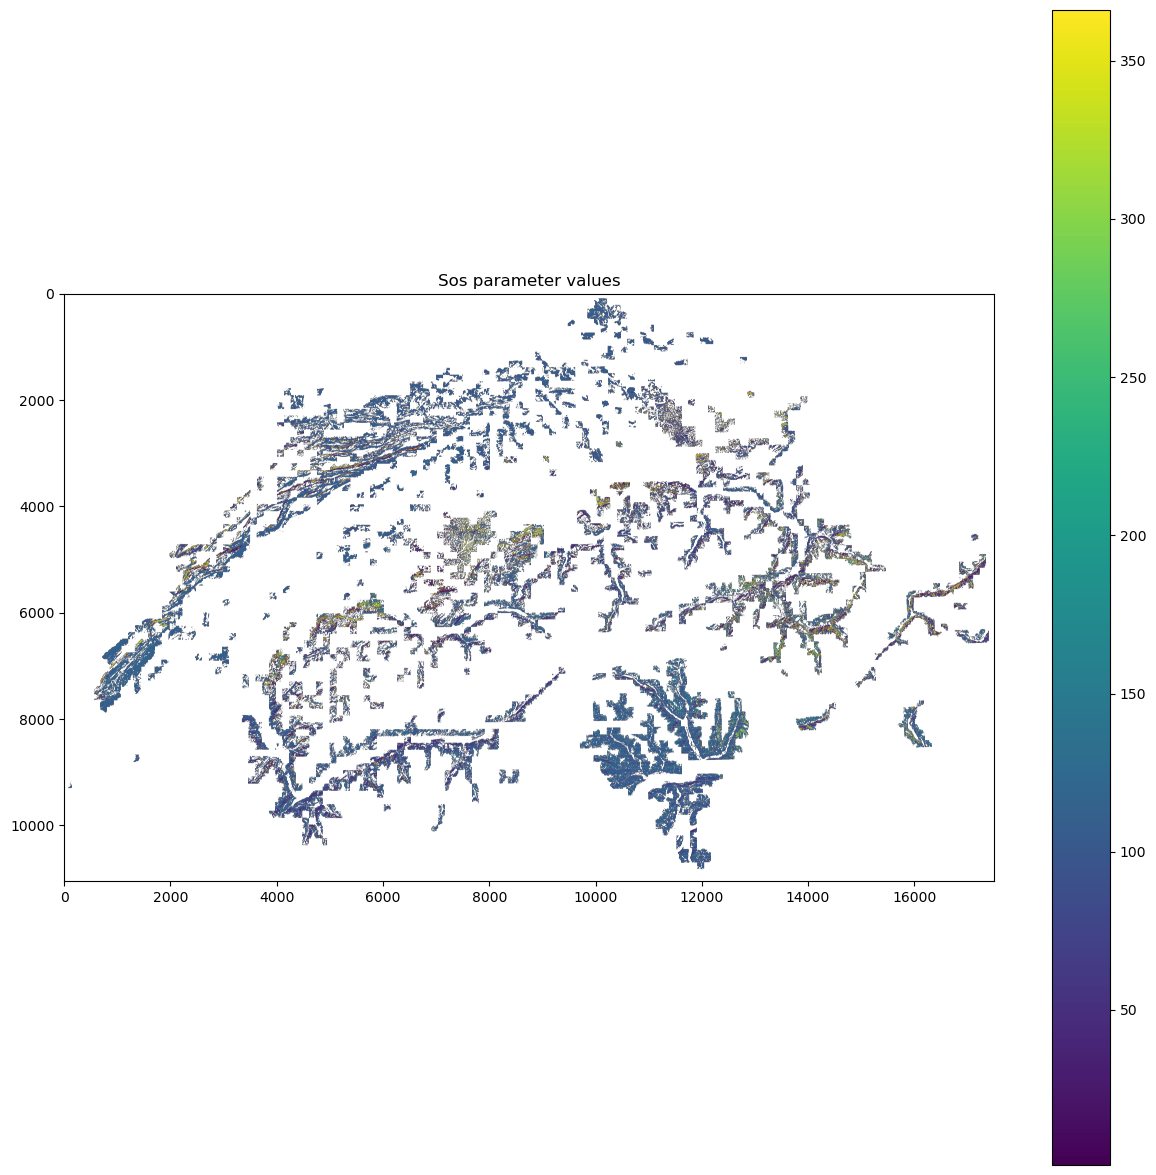

In [ ]:
# Plot parameter values
sos_2 = ds_params['data'][0].values*365
sos_2 = np.where(sos_2 < 1, sos + 365, sos)  # Adjust negative SOS to the previous year

plt.figure(figsize=(15, 15))
plt.imshow(sos_2)
plt.colorbar()
plt.title("Sos parameter values")
plt.show()